Checking for duplicates. 
Includes a few small test cases

In [2]:
import pandas as pd
import os
import imagehash
from PIL import Image


Test case images do have duplicates

In [2]:
import os
import imagehash
from PIL import Image

#tester block for hashing of images
directory = os.path.join(os.getcwd()+"\\testing_iterator\\a")

#directory1 = os.path.join(os.getcwd()+'\completely_new_images_sources_from_Kaggle\\test')
mk= len(os.listdir(directory))
hashes = []
for i in range(0,(mk)):
    k=0
    image1=imagehash.average_hash(Image.open(os.path.join(
        directory,os.listdir(directory)[i])))
    k+=1
    hashes.append(image1)
    #if i % 100 == 0:
    print(image1)

a1f08000000f7fff
ffdab8f8fcd80080
fe7f7fe3c1838f5f
2f0f0f37191f1b13
80001818181f1f1f
7f0f0301091d3fff
305e9f27bffff830
fff3f1e1818181c1
bfbf8f8fc7c7c3c0
343c1c1c1c0c3c3c
18383c3c3c7c6c4e
c2c7e79d276e7e08
f3d3e3e3e1e0e0f0
fbffefc747200000
bfe7e7c4cd1f0707


In [3]:
#directory = os.path.join(os.getcwd()+"\\testing_iterator\\a")

directory1 = os.path.join(os.getcwd()+"\\testing_iterator\\b")
mk= len(os.listdir(directory1))
hashes1 = []
for i in range(0,(mk)):
    k=0
    image1=imagehash.average_hash(Image.open(os.path.join(
        directory1,os.listdir(directory1)[i])))
    k+=1
    hashes1.append(image1)
    #if i % 100 == 0:
    print(image1)

a1f08000000f7fff
ffdab8f8fcd80080
fe7f7fe3c1838f5f
2f0f0f37191f1b13
80001818181f1f1f
7f0f0301091d3fff
305e9f27bffff830
fff3f1e1818181c1
bfbf8f8fc7c7c3c0
343c1c1c1c0c3c3c
18383c3c3c7c6c4e
c2c7e79d276e7e08
f3d3e3e3e1e0e0f0
fbffefc747200000
bfe7e7c4cd1f0707


In [4]:
a=set(hashes)
b=set(hashes1)
len(a.intersection(b))

15

Image folders are not entierly duplicates

In [5]:
#directory = os.path.join(os.getcwd()+"\\testing_iterator\\a")

directory2 = os.path.join(os.getcwd()+"\\testing_iterator\\c")
mk= len(os.listdir(directory2))
hashes2 = []
for i in range(0,(mk)):
    k=0
    image1=imagehash.average_hash(Image.open(os.path.join(
        directory2,os.listdir(directory2)[i])))
    k+=1
    hashes2.append(image1)
    #if i % 100 == 0:
    print(image1)

1f339f884060eb1f
fbc00367c3878741
001a1e1e0e3c3c08
001006167e7c3c1d
a1f08000000f7fff
ffdab8f8fcd80080
fe7f7fe3c1838f5f
2f0f0f37191f1b13
80001818181f1f1f
7f0f0301091d3fff
305e9f27bffff830
fff3f1e1818181c1
bfbf8f8fc7c7c3c0
343c1c1c1c0c3c3c
18383c3c3c7c6c4e
c2c7e79d276e7e08
f3d3e3e3e1e0e0f0
fbffefc747200000
bfe7e7c4cd1f0707
ffef67c68008083e
202078f8f8f8f818
ffb3a02121010f3f
00f67f3638383839
fe7ee2e0e0f0f0f8
e3f3f4c0c8c0f0ff
0000808087b7ffff
8787000807c7f3f0


In [10]:
a=set(hashes)
c=set(hashes2)
print(len(a.intersection(c)))
print(len(c.difference(a)))

15
12


Small test case to see that the file purging works as it should (by plotting the duplicate images)

In [8]:
import os
import imagehash
from PIL import Image

#tester block for hashing of images
directory1 = os.path.join(os.getcwd()+"\\testing_iterator\\d")

#directory1 = os.path.join(os.getcwd()+'\completely_new_images_sources_from_Kaggle\\test')
mk= len(os.listdir(directory1))
hashes = []
for i in range(0,(mk)):
    k=0
    image1=imagehash.average_hash(Image.open(os.path.join(
        directory1,os.listdir(directory1)[i])))
    k+=1
    hashes.append(image1)
    if i % 100 == 0:
        print(i)

0


In [9]:
print(len(hashes))
a=set(hashes)
len(a)

22


15

In [51]:
directory1 = os.path.join(os.getcwd()+"\\testing_iterator\\d")
list_for_hashing = []
files_to_purge = []
files_to_keep=[]
files_to_purge1 =[]

for file in os.listdir(directory1):
    image1=imagehash.average_hash(Image.open(os.path.join(directory1,file)))
    if image1 not in list_for_hashing:
        list_for_hashing.append(image1)
        files_to_keep.append(file)
    else:
        print(file,image1)
        files_to_purge.append([file,image1])
        files_to_purge1.append(image1)

cat_3.jpg 80001818181f1f1f
cat_4.jpg fff3f1e1818181c1
cat_52.jpg 18383c3c3c7c6c4e
cat_53.jpg c2c7e79d276e7e08
cat_54.jpg f3d3e3e3e1e0e0f0
cat_6.jpg fbffefc747200000
cat_9.jpg bfe7e7c4cd1f0707


In [52]:
zipped = list(zip(files_to_keep, list_for_hashing))
m=pd.DataFrame(zipped)
q = pd.DataFrame(files_to_purge)
pqm= q.merge(m, on = 1, how = 'inner')
file_list = list(pqm['0_x'])
file_list1 = list(pqm['0_y'])

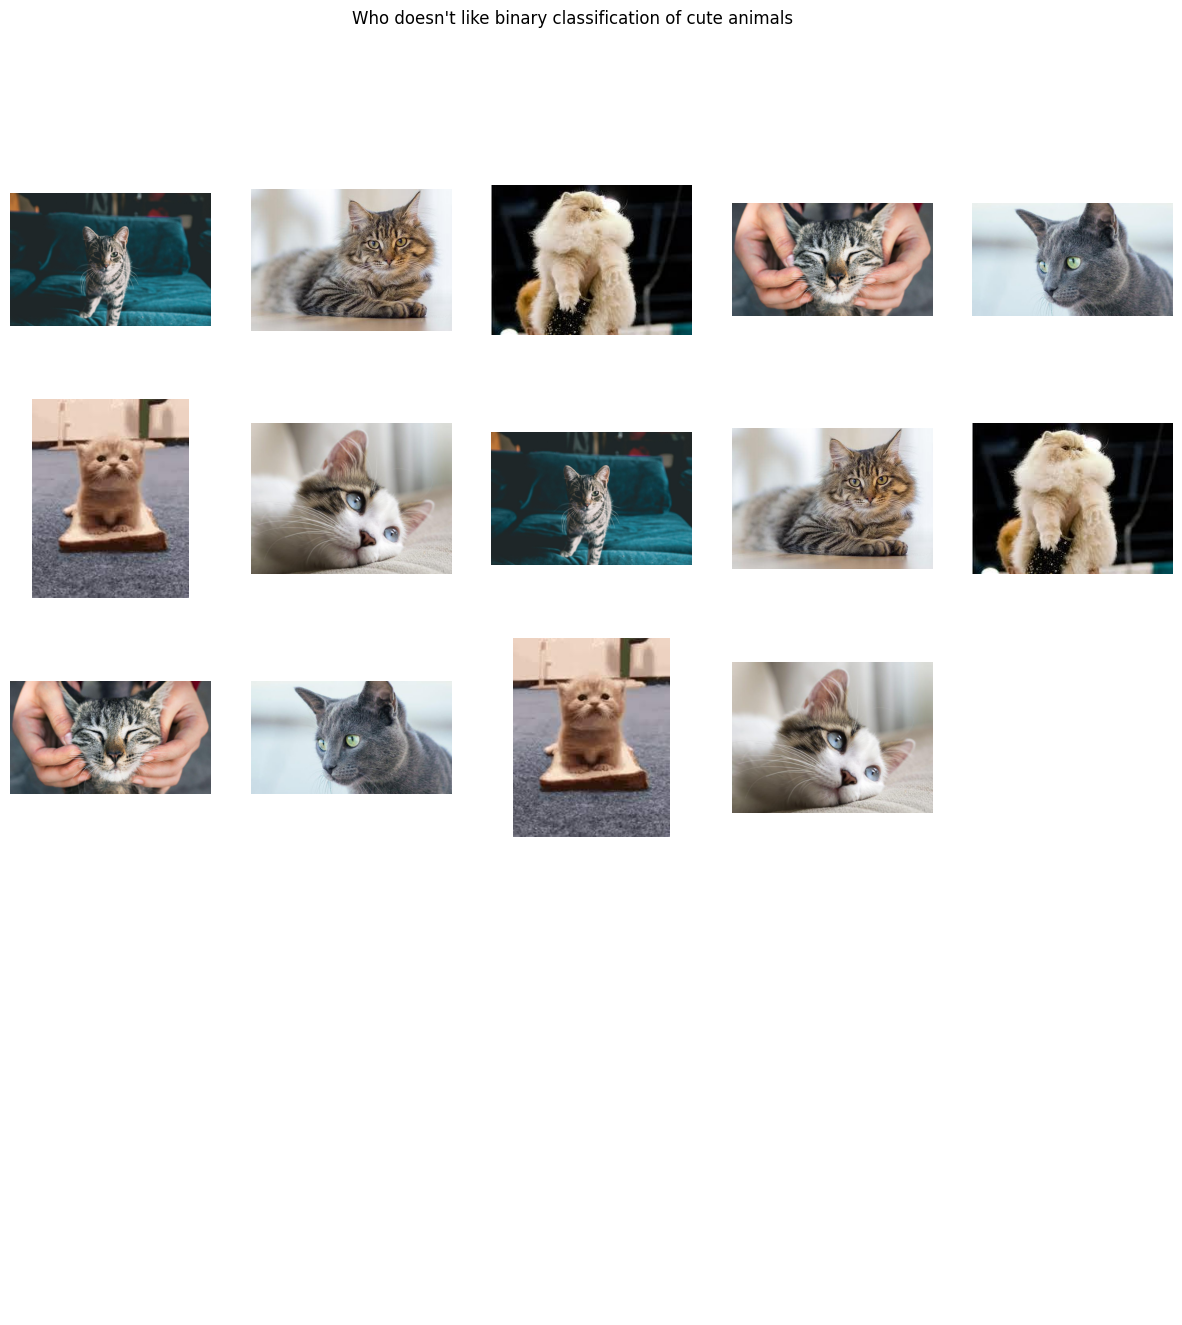

In [53]:
from matplotlib import pyplot as plt
larger_list=[]
directory= (os.getcwd()+'\\testing_iterator\\d')
q = 1
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(5,5,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+= 1 #<- Make it so there are not so many files


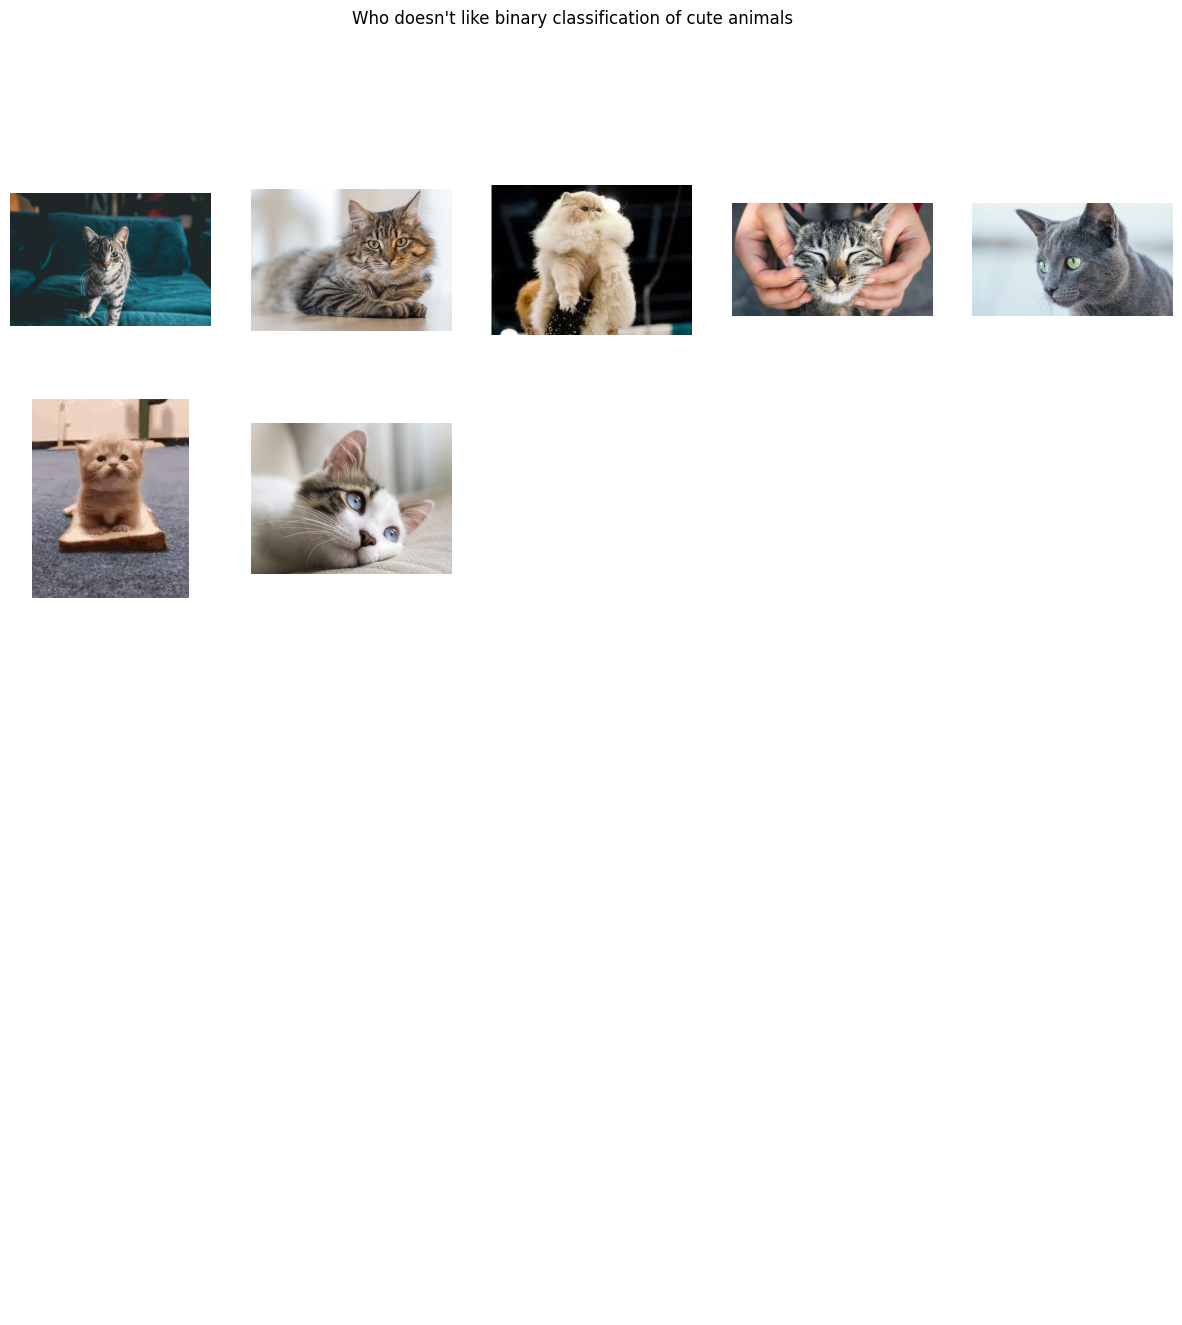

In [56]:
directory= (os.getcwd()+'\\testing_iterator\\d')
q = 1
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list1:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(5,5,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+= 1 #<- Make it so there are not so many files

In [64]:
directory3=(os.getcwd()+'\\testing_iterator\\d')
for file in os.listdir(directory3):
    if file in file_list1:
        okay= os.path.join(directory3,file)
        if os.path.exists(okay):
            os.remove(okay)
        else:
            pass

And the folder should return no duplicate test cases

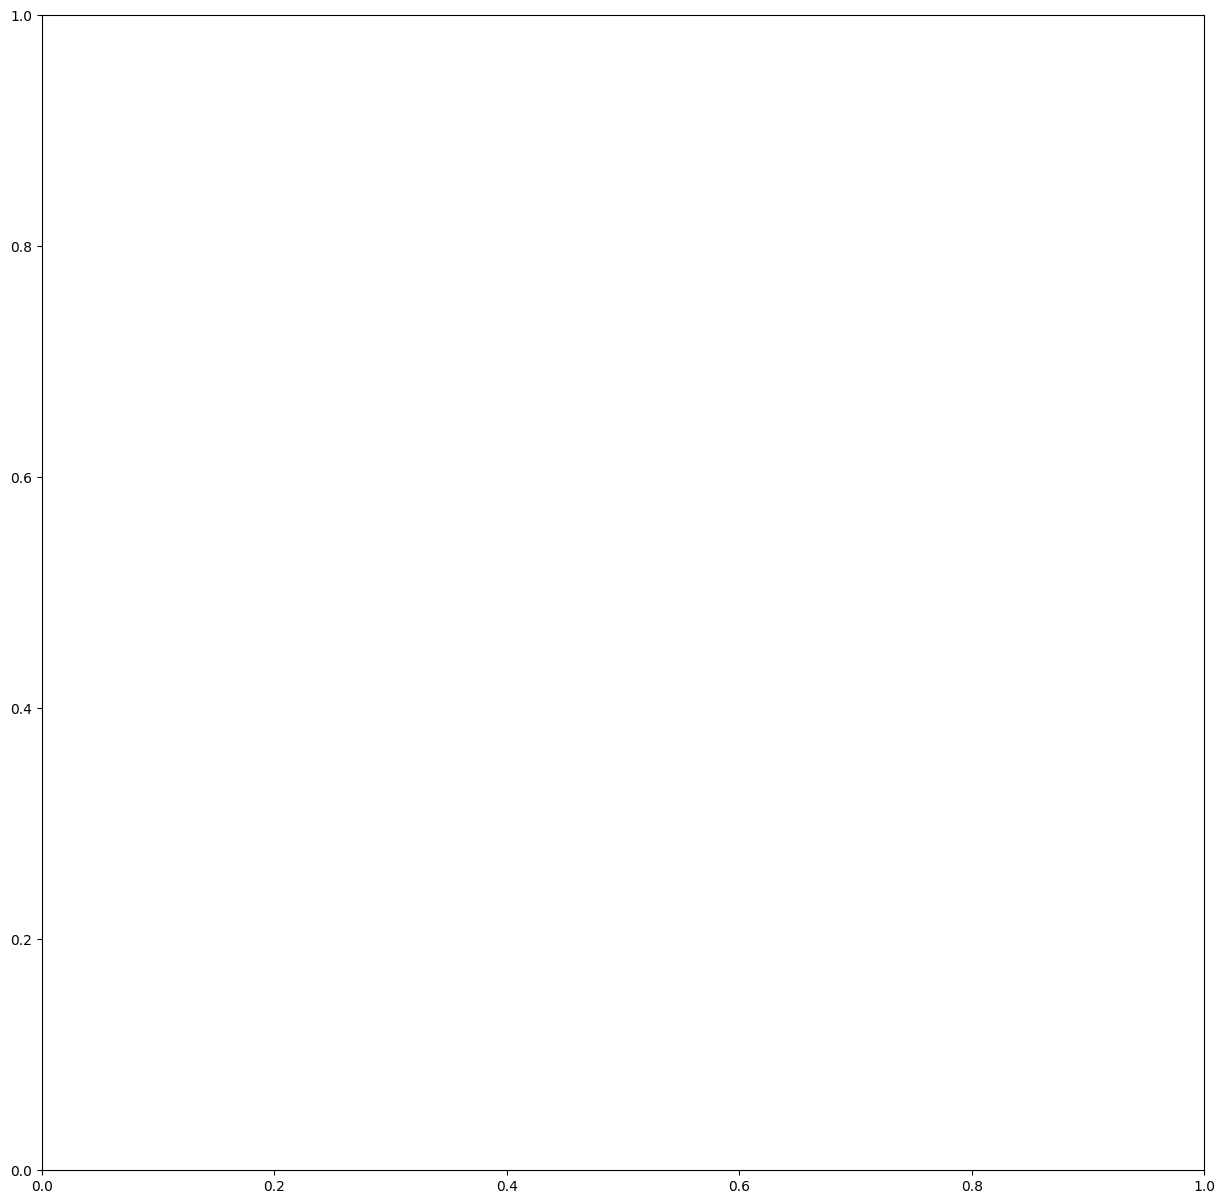

In [65]:
directory= (os.getcwd()+'\\testing_iterator\\d')
q = 1
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list1:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(5,5,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+= 1 #<- Make it so there are not so many files

In [1]:

directory1 = os.path.join(os.getcwd()+'\completely_new_images_sources_from_Kaggle\\_test')
list_for_hashing = []
files_to_keep = []
files_to_purge = []
files_to_purge1 = []
for file in os.listdir(directory1):
    image1=imagehash.average_hash(Image.open(os.path.join(directory1,file)))
    if image1 not in list_for_hashing:
        list_for_hashing.append(image1)
        files_to_keep.append(file)
    else:
        print(file,image1)
        files_to_purge.append([file,image1])
        files_to_purge1.append(image1)
        
        

NameError: name 'os' is not defined

In [67]:
len(files_to_purge)

17

In [68]:
len(list_for_hashing)

539

In [69]:
zipped = list(zip(files_to_keep, list_for_hashing))

In [71]:
m=pd.DataFrame(zipped)

In [72]:
m.head(1)

0                 1
0  cat_10.jpg  a1f08000000f7fff

In [73]:
q = pd.DataFrame(files_to_purge)

In [74]:
pqm= q.merge(m, on = 1, how = 'inner')

In [75]:
len(pqm)

17

In [76]:
pqm

0_x                 1          0_y
0   cat_275.jpg  ffff3f27218f8f0f  cat_208.jpg
1   cat_363.jpg  ffff878181d1ffff  cat_161.jpg
2    cat_37.jpg  ffffffffc3c18000  cat_177.jpg
3    cat_49.jpg  bfbf8f8fc7c7c3c0  cat_137.jpg
4   cat_540.jpg  ffc7c3c1c18181cf   cat_21.jpg
5   cat_604.jpg  ffff9f9f83000000  cat_209.jpg
6    cat_78.jpg  ffe4e1c1c1e3af83  cat_263.jpg
7    cat_93.jpg  e7e3e3c0c0c4c3c3  cat_536.jpg
8   dog_256.jpg  ffffffffc1000001  dog_116.jpg
9   dog_323.jpg  ffefffd3f3f312ff   dog_11.jpg
10  dog_334.jpg  fffbe1c183c3dfdf  dog_216.jpg
11  dog_381.jpg  e7efefcff7f3f3e7  dog_333.jpg
12  dog_450.jpg  ffc7c7c3c3c1c7ff  dog_441.jpg
13  dog_475.jpg  0030786878784c0e   dog_35.jpg
14  dog_525.jpg  e7e7e7e7e7c3c3c3  dog_305.jpg
15  dog_596.jpg  3f3f81c1c9d9fbff  dog_266.jpg
16   dog_77.jpg  ffe3e7e7c7c7e7f7  dog_514.jpg

There are some duplicates so those need to be purged.

In [77]:
os.getcwd()

'c:\\Users\\amcfa\\Desktop\\Pytorch_model_project_'

In [78]:
file_list = list(pqm['0_x'])
file_list1 = list(pqm['0_y'])

In [79]:
directory1 = os.path.join(os.getcwd()+'\completely_new_images_sources_from_Kaggle\_test')

Checking for duplicates

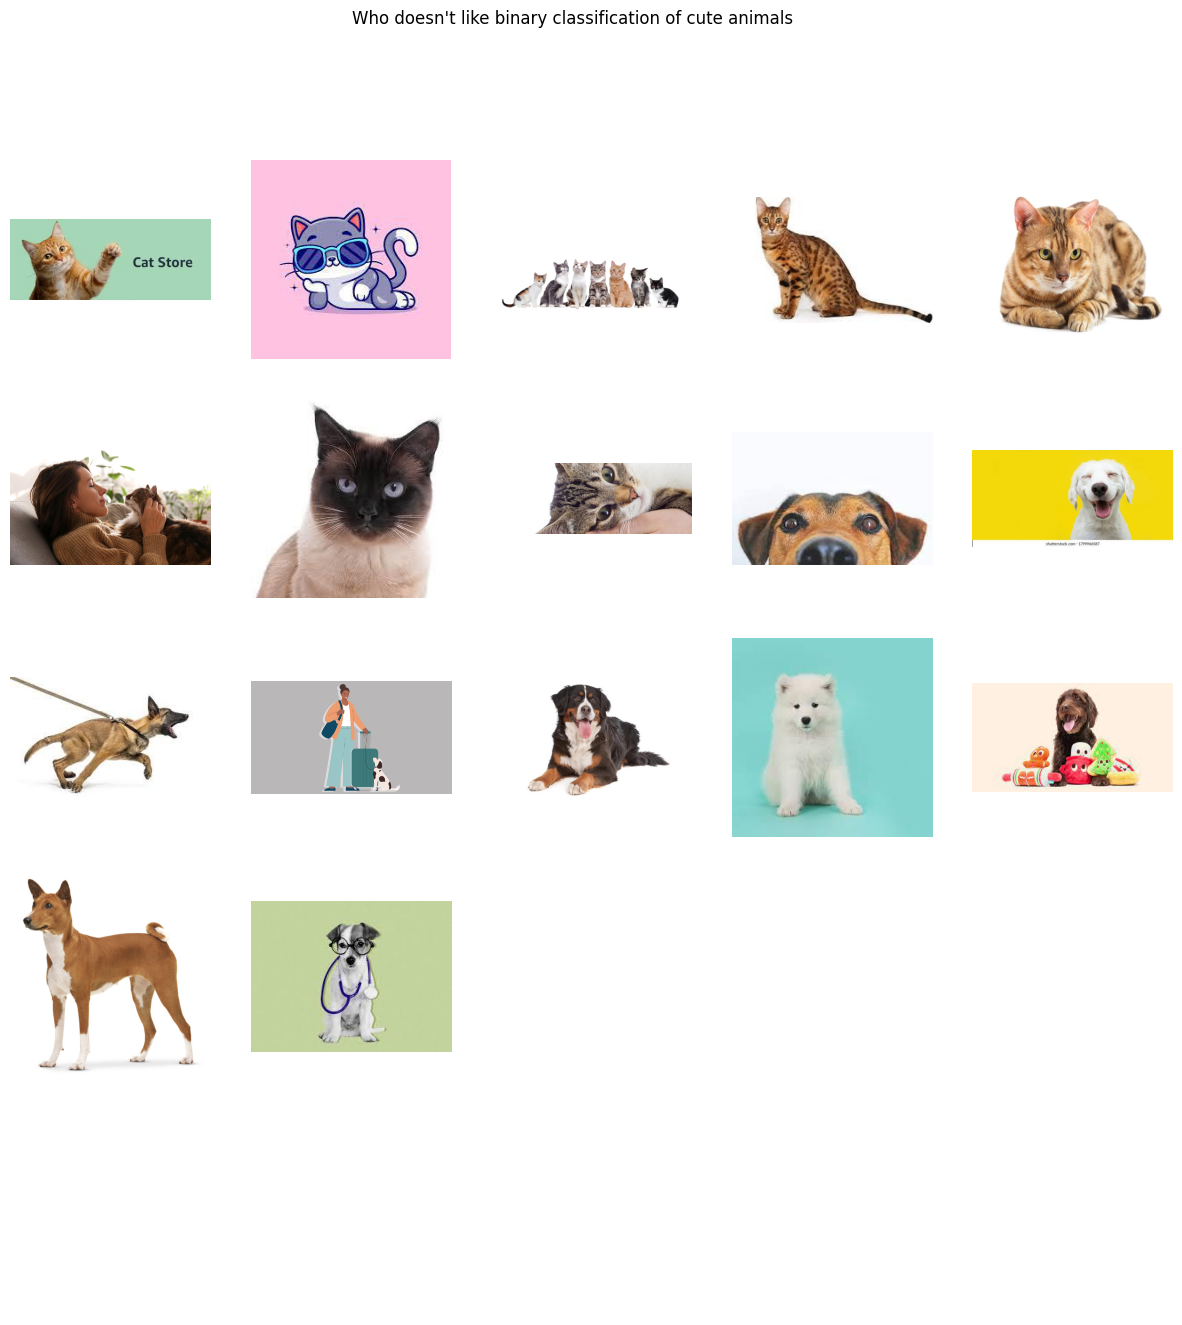

In [80]:
from matplotlib import pyplot as plt
larger_list=[]
directory= (os.getcwd()+'\completely_new_images_sources_from_Kaggle\_test')
q = 1
lengths1=len(pqm)
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(5,5,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+=1 #<- Make it so there are not so many files


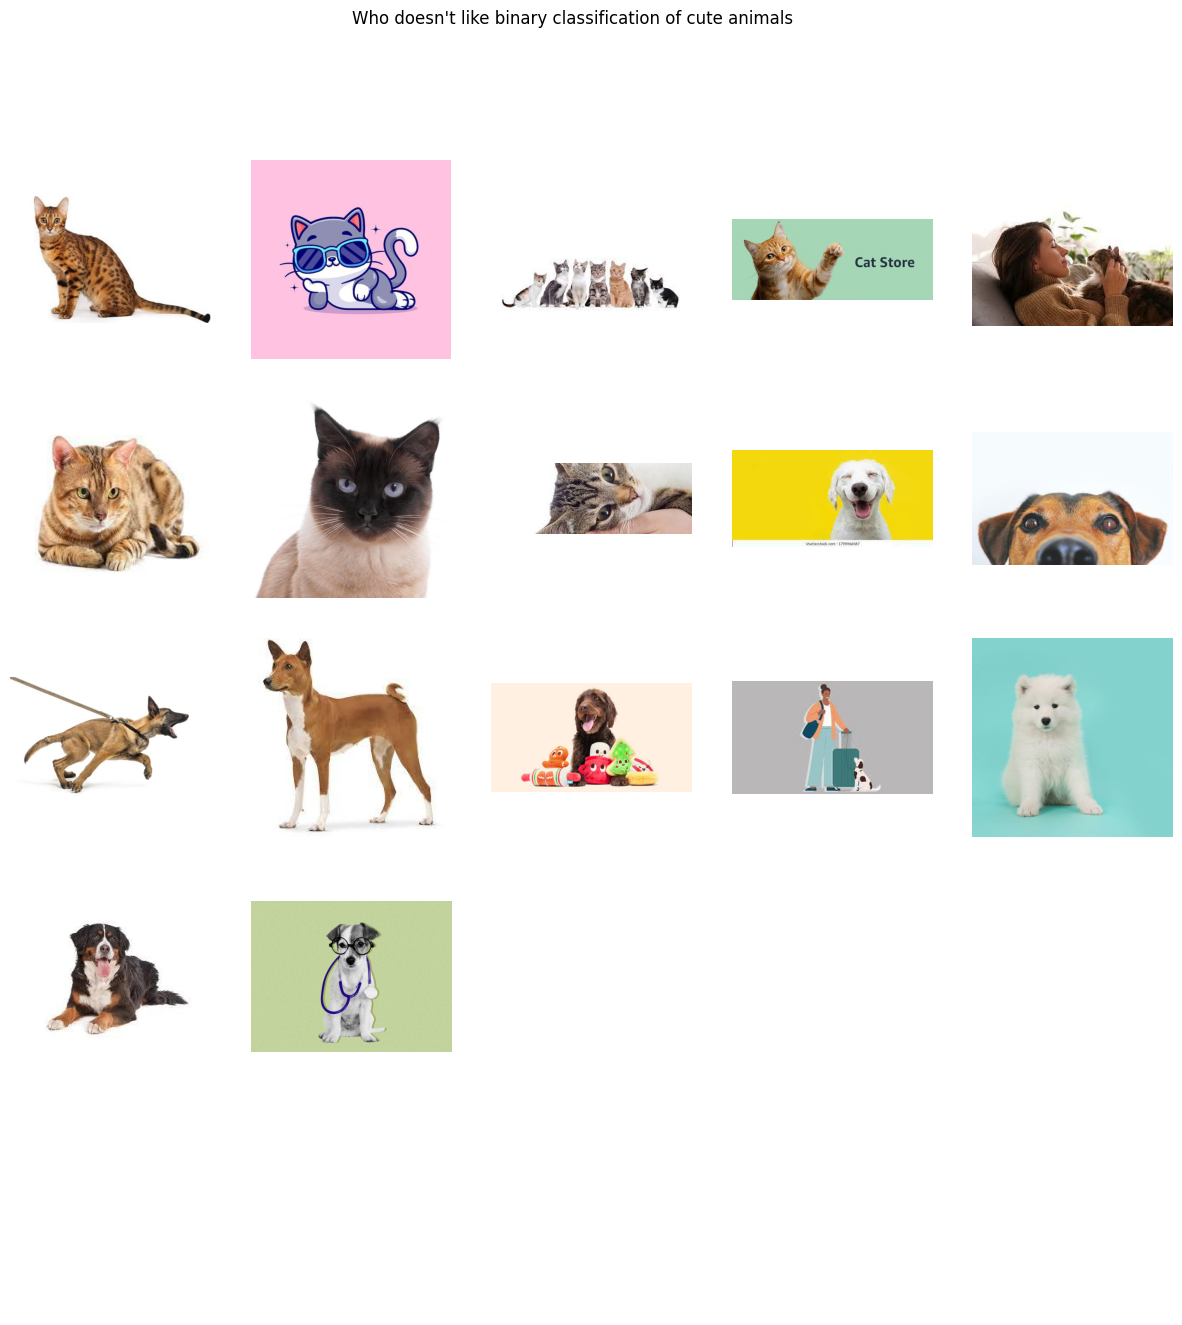

In [81]:
from matplotlib import pyplot as plt
larger_list=[]
directory= (os.getcwd()+'\completely_new_images_sources_from_Kaggle\_test')
q = 1
lengths1=len(pqm)
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list1:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(5,5,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+=1 #<- Make it so there are not so many files

In [82]:
directory= (os.getcwd()+'\completely_new_images_sources_from_Kaggle\_test')
for file in os.listdir(directory):
    if file in file_list1:
        okay= os.path.join(directory,file)
        if os.path.exists(okay):
            os.remove(okay)
        else:
            pass

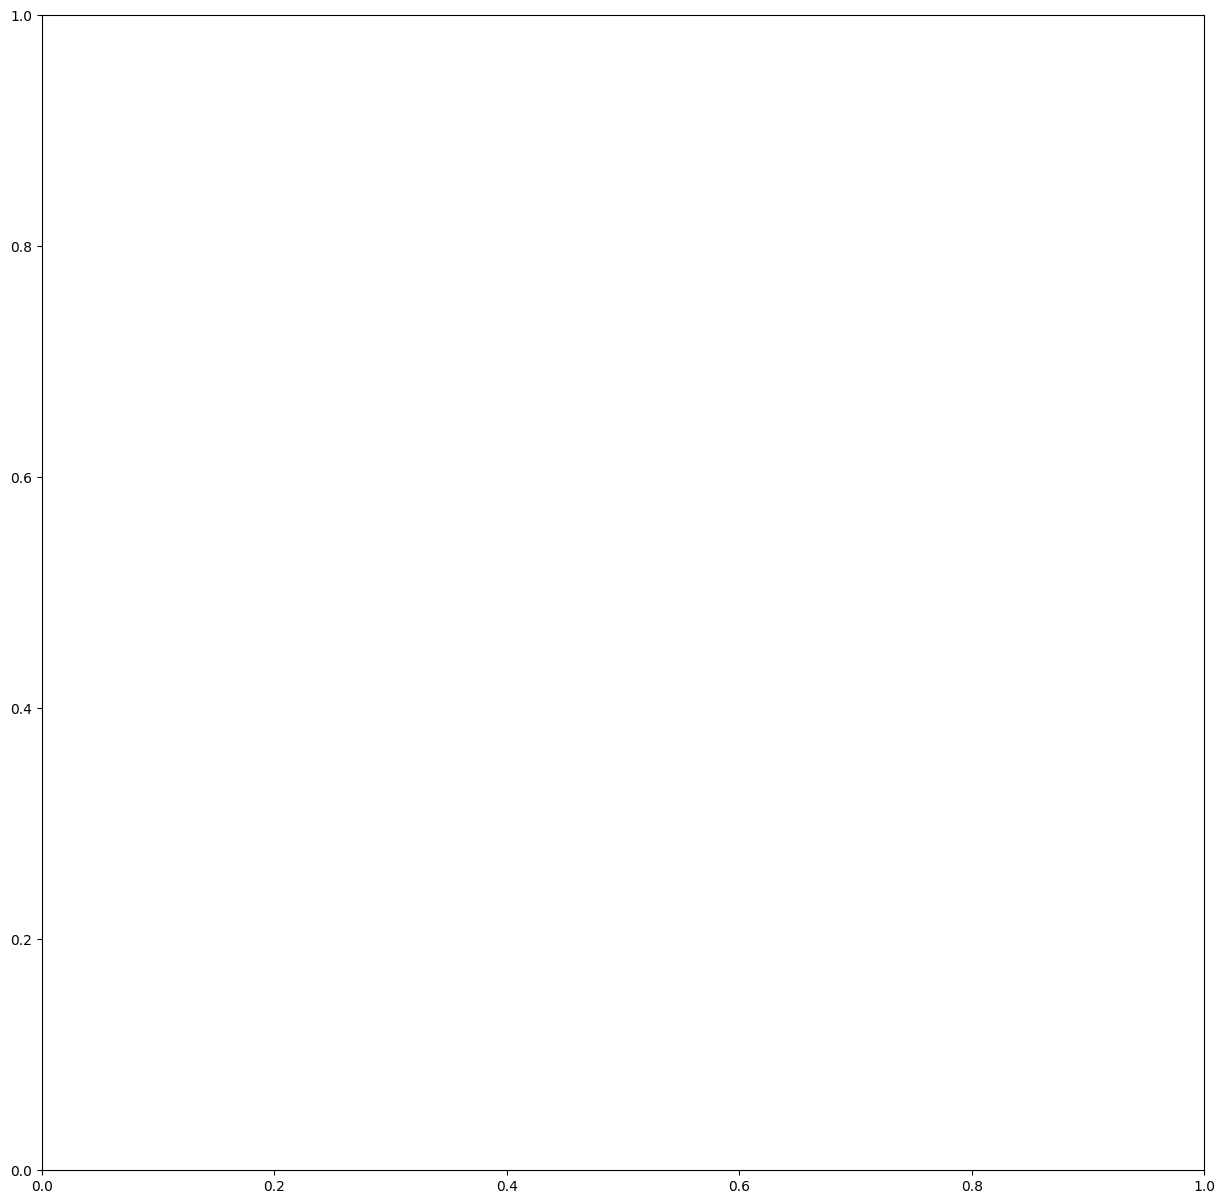

In [83]:
from matplotlib import pyplot as plt
larger_list=[]
directory= (os.getcwd()+'\completely_new_images_sources_from_Kaggle\_test')
q = 1
lengths1=len(pqm)
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list1:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(5,5,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+=1 #<- Make it so there are not so many files

In [84]:
directory1 = os.path.join(os.getcwd()+'\completely_new_images_sources_from_Kaggle\\_test')
list_for_hashing = []
files_to_keep = []
files_to_purge = []
files_to_purge1 = []
for file in os.listdir(directory1):
    image1=imagehash.average_hash(Image.open(os.path.join(directory1,file)))
    if image1 not in list_for_hashing:
        list_for_hashing.append(image1)
        files_to_keep.append(file)
    else:
        print(file,image1)
        files_to_purge.append([file,image1])
        files_to_purge1.append(image1)

Going to redo my training and test data. 

Kaggle test data first

In [85]:
directory1 = os.path.join(os.getcwd()+'\completely_new_images_sources_from_Kaggle\\test')
list_for_hashing = []
files_to_keep = []
files_to_purge = []
files_to_purge1 = []
for file in os.listdir(directory1):
    image1=imagehash.average_hash(Image.open(os.path.join(directory1,file)))
    if image1 not in list_for_hashing:
        list_for_hashing.append(image1)
        files_to_keep.append(file)
    else:
        print(file,image1)
        files_to_purge.append([file,image1])
        files_to_purge1.append(image1)

cat_275.jpg ffff3f27218f8f0f
cat_363.jpg ffff878181d1ffff
cat_37.jpg ffffffffc3c18000
cat_49.jpg bfbf8f8fc7c7c3c0
cat_540.jpg ffc7c3c1c18181cf
cat_604.jpg ffff9f9f83000000
cat_78.jpg ffe4e1c1c1e3af83
cat_93.jpg e7e3e3c0c0c4c3c3
dog_256.jpg ffffffffc1000001
dog_323.jpg ffefffd3f3f312ff
dog_334.jpg fffbe1c183c3dfdf
dog_381.jpg e7efefcff7f3f3e7
dog_450.jpg ffc7c7c3c3c1c7ff
dog_475.jpg 0030786878784c0e
dog_525.jpg e7e7e7e7e7c3c3c3
dog_596.jpg 3f3f81c1c9d9fbff
dog_77.jpg ffe3e7e7c7c7e7f7


In [86]:
zipped = list(zip(files_to_keep, list_for_hashing))
m=pd.DataFrame(zipped)
q = pd.DataFrame(files_to_purge)
pqm= q.merge(m, on = 1, how = 'inner')
file_list = list(pqm['0_x'])
file_list1 = list(pqm['0_y'])

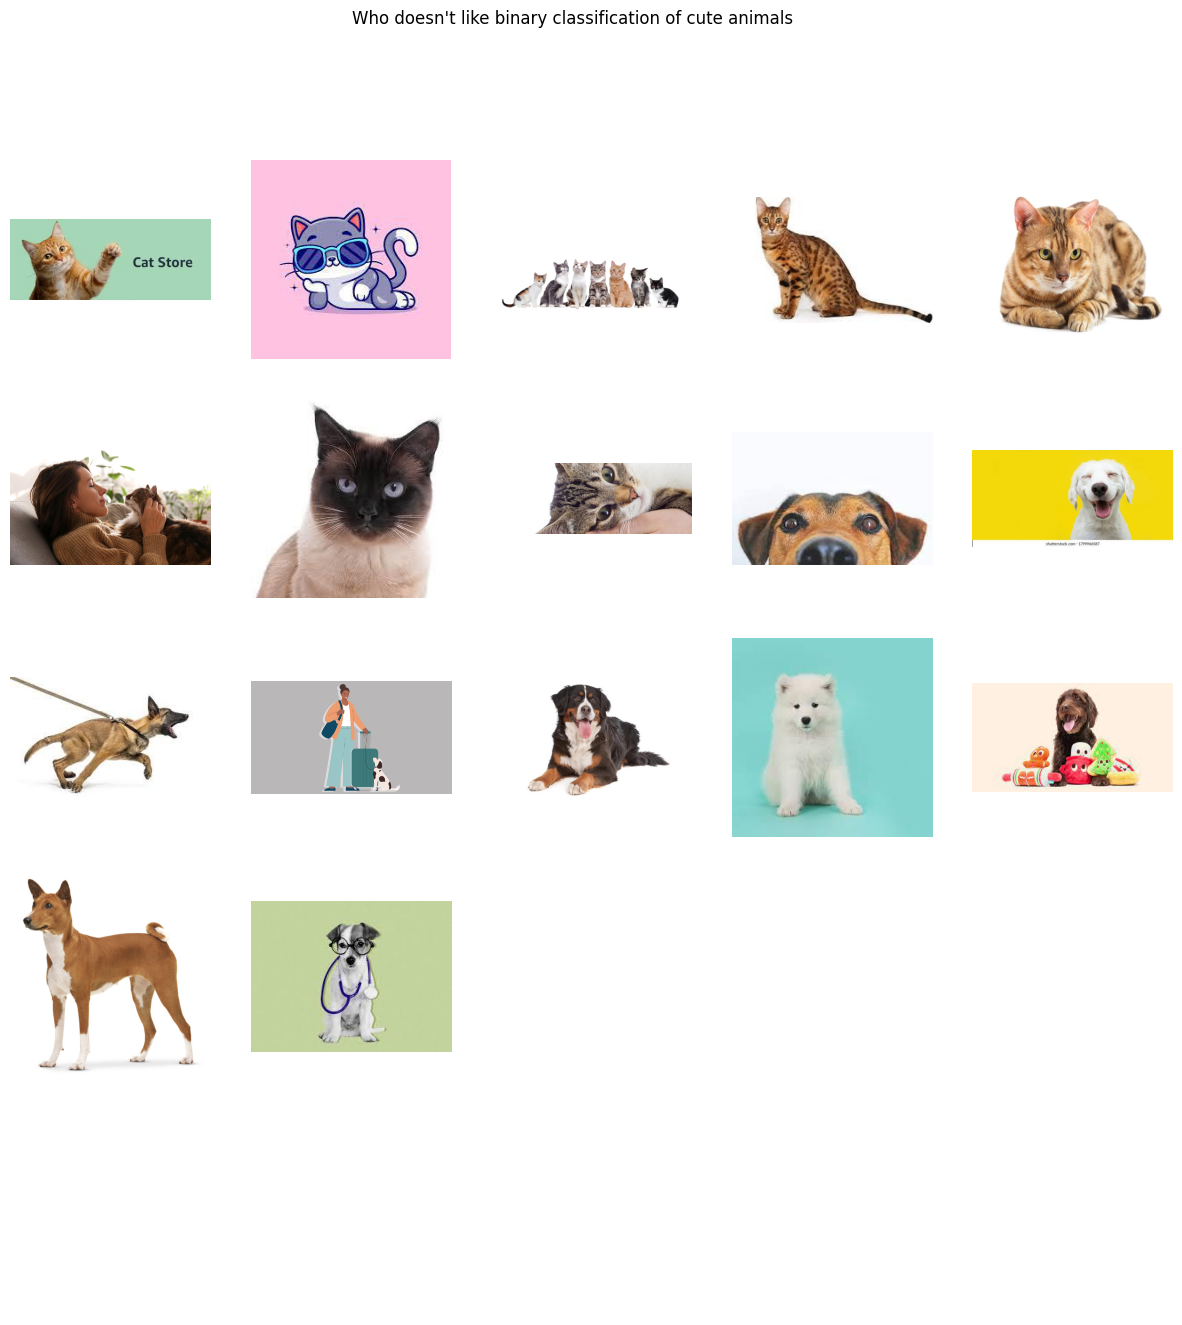

In [87]:
from matplotlib import pyplot as plt
larger_list=[]
directory= (os.getcwd()+'\completely_new_images_sources_from_Kaggle\\test')
q = 1
lengths1=len(pqm)
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(5,5,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+=1 #<- Make it so there are not so many files

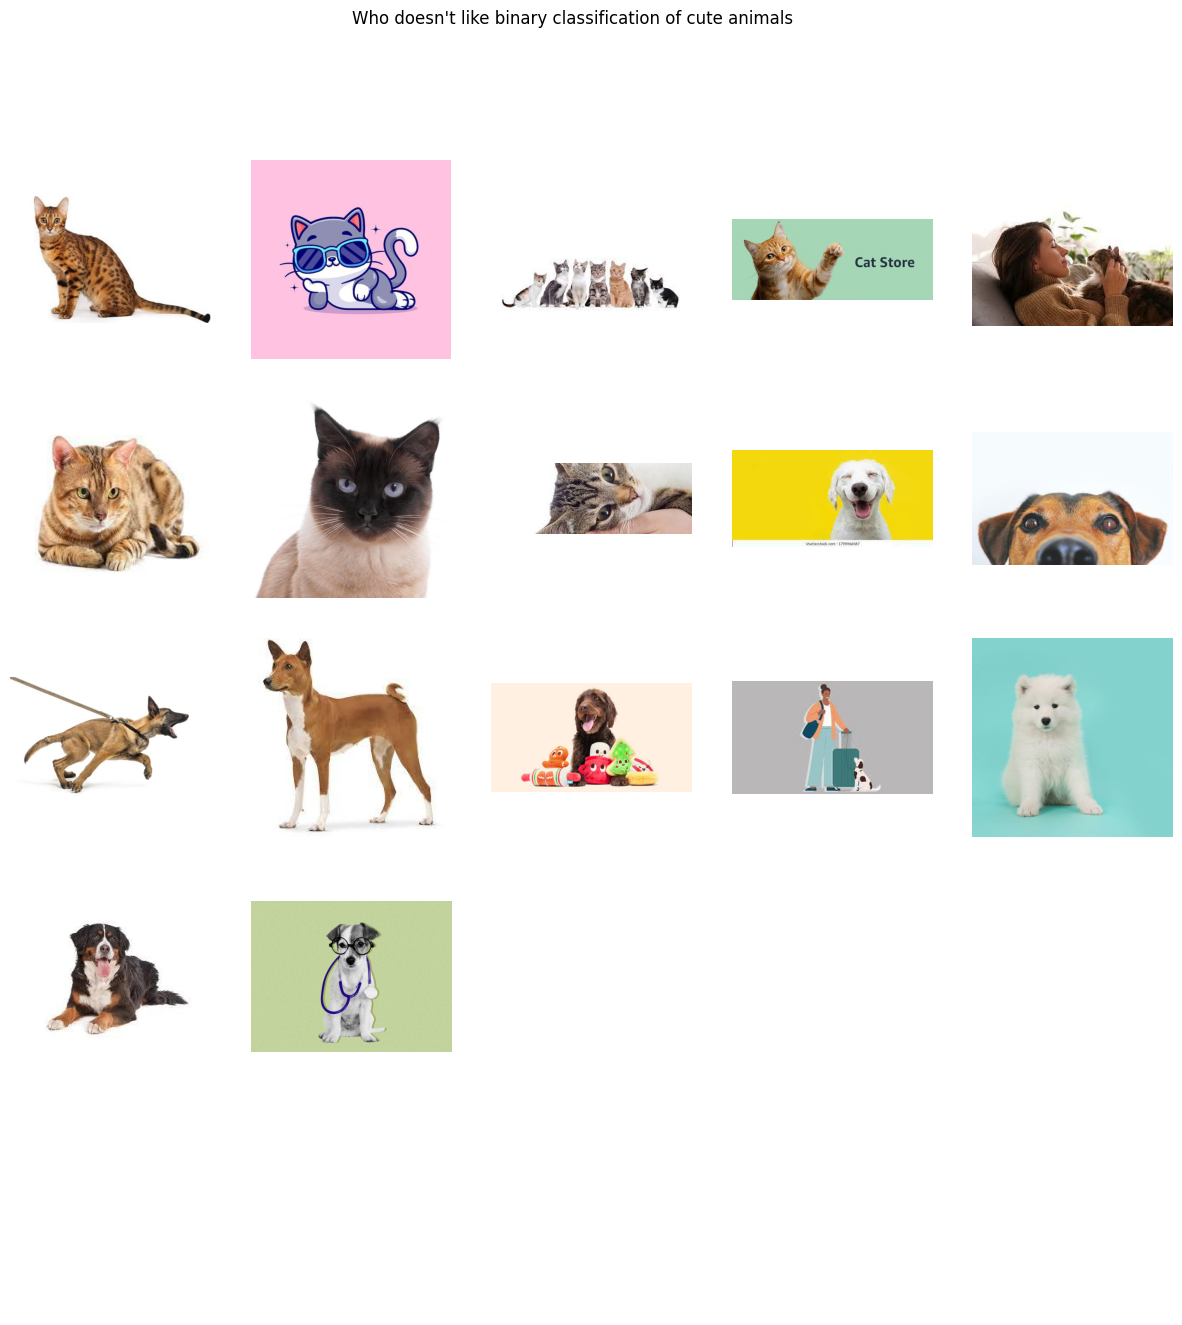

In [88]:
from matplotlib import pyplot as plt
larger_list=[]
directory= (os.getcwd()+'\completely_new_images_sources_from_Kaggle\\test')
q = 1
lengths1=len(pqm)
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list1:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(5,5,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+=1 #<- Make it so there are not so many files

In [89]:
directory= (os.getcwd()+'\completely_new_images_sources_from_Kaggle\\test')
for file in os.listdir(directory):
    if file in file_list1:
        okay= os.path.join(directory,file)
        if os.path.exists(okay):
            os.remove(okay)
        else:
            pass

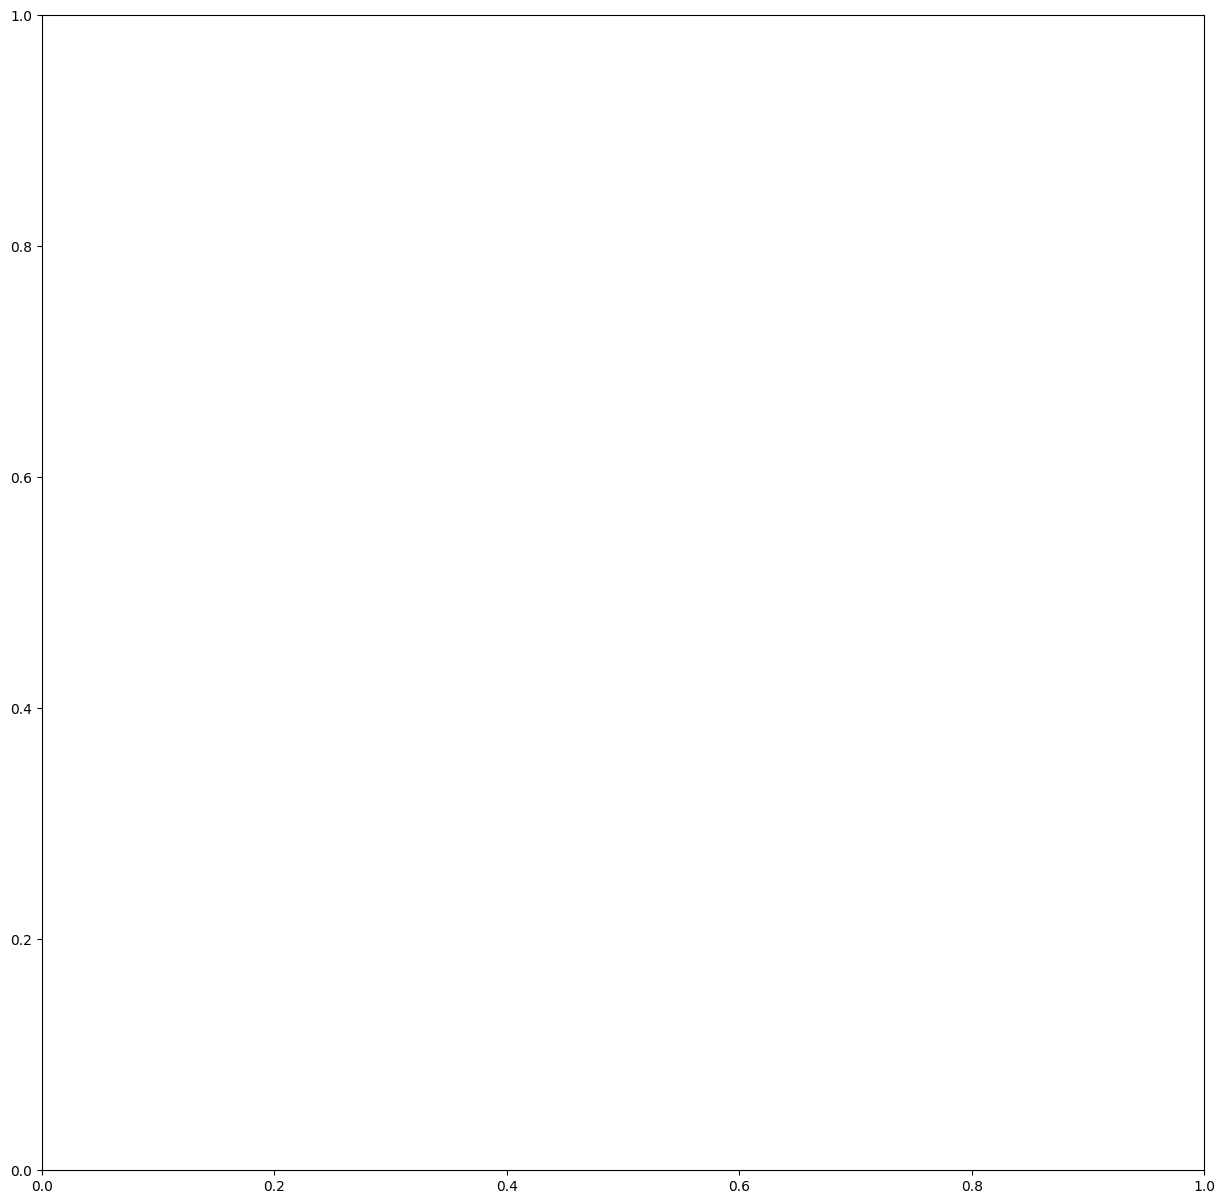

In [90]:
from matplotlib import pyplot as plt
larger_list=[]
directory= (os.getcwd()+'\completely_new_images_sources_from_Kaggle\\test')
q = 1
lengths1=len(pqm)
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list1:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(5,5,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+=1 #<- Make it so there are not so many files

In [91]:
directory1 = os.path.join(os.getcwd()+'\completely_new_images_sources_from_Kaggle\\test')
list_for_hashing = []
files_to_keep = []
files_to_purge = []
files_to_purge1 = []
for file in os.listdir(directory1):
    image1=imagehash.average_hash(Image.open(os.path.join(directory1,file)))
    if image1 not in list_for_hashing:
        list_for_hashing.append(image1)
        files_to_keep.append(file)
    else:
        print(file,image1)
        files_to_purge.append([file,image1])
        files_to_purge1.append(image1)

Now the actual data

In [125]:

directory1 = os.path.join(os.getcwd()+'\PetImages\Cat')

list_for_hashing = []
files_to_keep = []
files_to_purge = []
files_to_purge1 = []
for file in os.listdir(directory1):
    image1=imagehash.average_hash(Image.open(os.path.join(directory1,file)))
    if image1 not in list_for_hashing:
        list_for_hashing.append(image1)
        files_to_keep.append(file)
    else:
        print(file,image1)
        files_to_purge.append([file,image1])
        files_to_purge1.append(image1)

cat (11975).jpg 9c90888cc0e0ffff
cat (1640).jpg 03878f1f39181c1c
cat (1931).jpg 0078fcfffe3c3800
cat (2340).jpg 07030312bfffb0d3
cat (3346).jpg 7940000001c1bfff
cat (3566).jpg 3012163c7878f9f0
cat (3911).jpg 0000f8f8f9bcd0f9
cat (4436).jpg 003f03000e0e0e08
cat (4576).jpg 1f3f0f0301737f0f
cat (4668).jpg f8f88e5c5c3c3cfe
cat (4727).jpg f7c5f03e1e01070f
cat (6205).jpg 070743ec7c60e0f0
cat (6443).jpg 0000000383ffffff
cat (7546).jpg 737f7f2395c44c38
cat (7913).jpg 0c0c0cecccfcfefe
cat (8138).jpg 7f7f07070707eefe
cat (8509).jpg 00000081f7ffffff
cat (9178).jpg 00223e3e3c3c7c7c
cat (9241).jpg ffddc1c181030103
cat (9589).jpg ffff939183070303
cat (9967).jpg fffbfbd1802000e4
dog (10402).jpg ffffe7e3c3c3c3c3
dog (10798).jpg ffffe7e3c3c3c3c3
dog (2878).jpg ffffe7e3c3c3c3c3
dog (3083).jpg f0f260f0f8781000
dog (5294).jpg 00000000ffffffff
dog (6027).jpg 6f9f9393838080c0
dog (6059).jpg 00c09098fffffef4
dog (6701).jpg 041e03343e180008
dog (6718).jpg 00607078fcfcfefe
dog (6903).jpg fe8fc3e31110010b
dog (

c:\Users\amcfa\Desktop\Pytorch_model_project_\.venv\Lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


dog (964).jpg e0e0e0e0e0e0c0c0
dog (9747).jpg f8f8e0e0c880d092
dog (981).jpg 793c383a3e0e1e12
dog (9957).jpg 3f3f03400899dcff


In [126]:
zipped = list(zip(files_to_keep, list_for_hashing))
m=pd.DataFrame(zipped)
q = pd.DataFrame(files_to_purge)
pqm= q.merge(m, on = 1, how = 'inner')
file_list = list(pqm['0_x'])
file_list1 = list(pqm['0_y'])

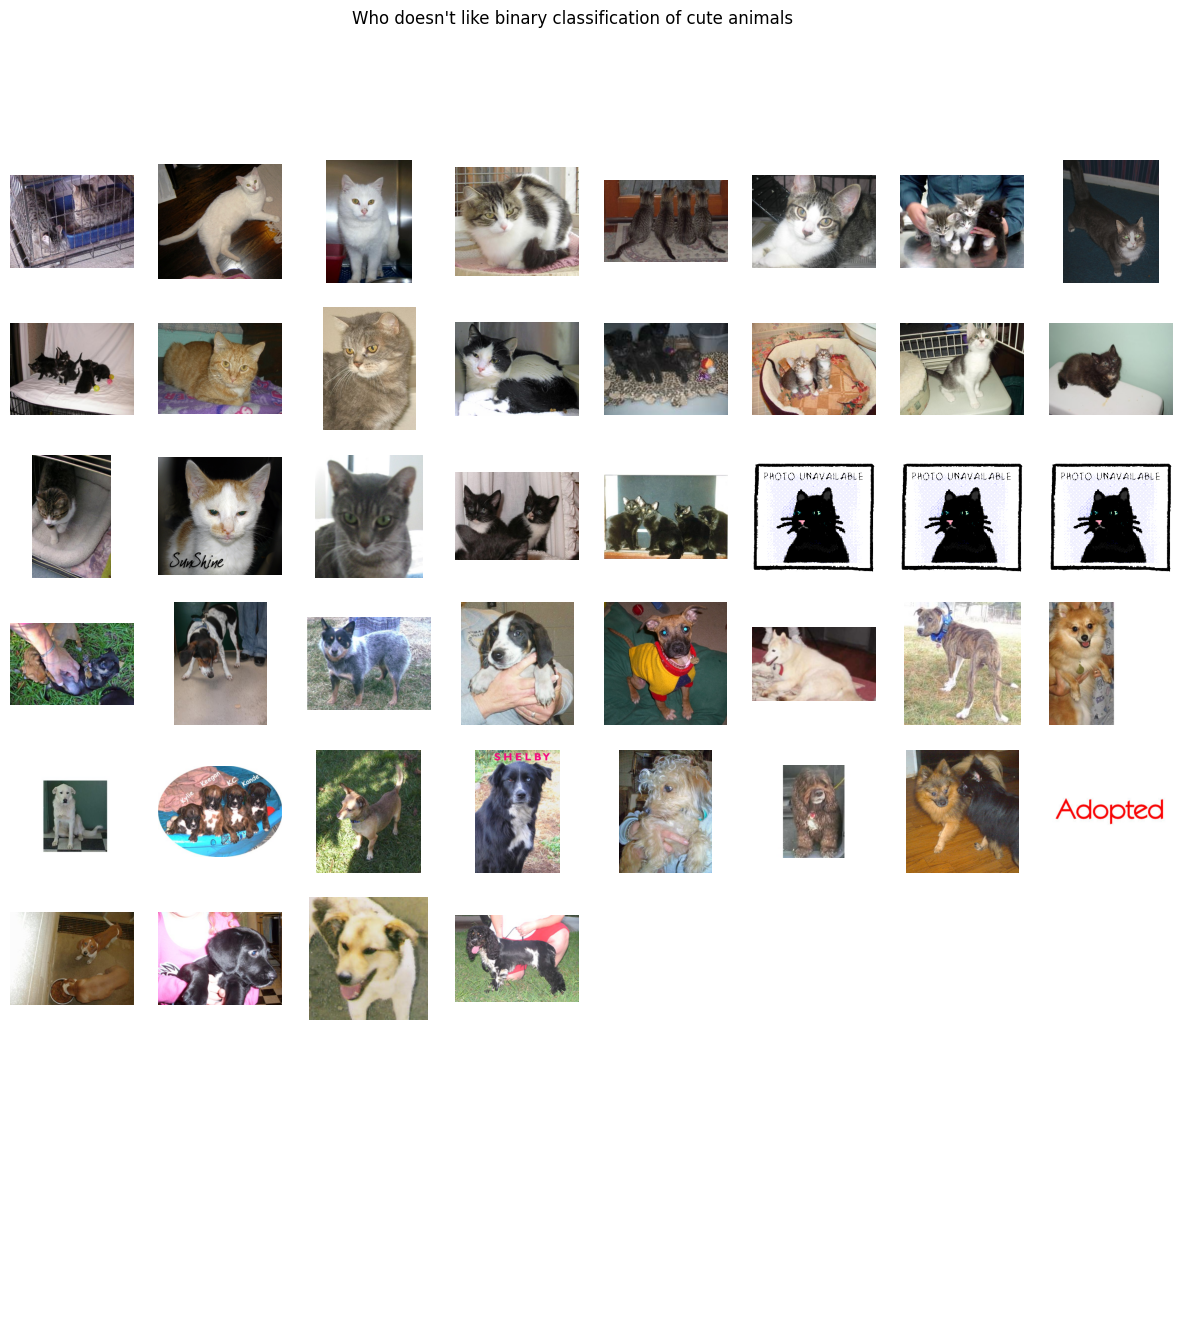

In [127]:
from matplotlib import pyplot as plt
larger_list=[]
directory= (os.getcwd()+'\PetImages\Cat')
q = 1
lengths1=len(pqm)
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(8,8,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+=1 #<- Make it so there are not so many files

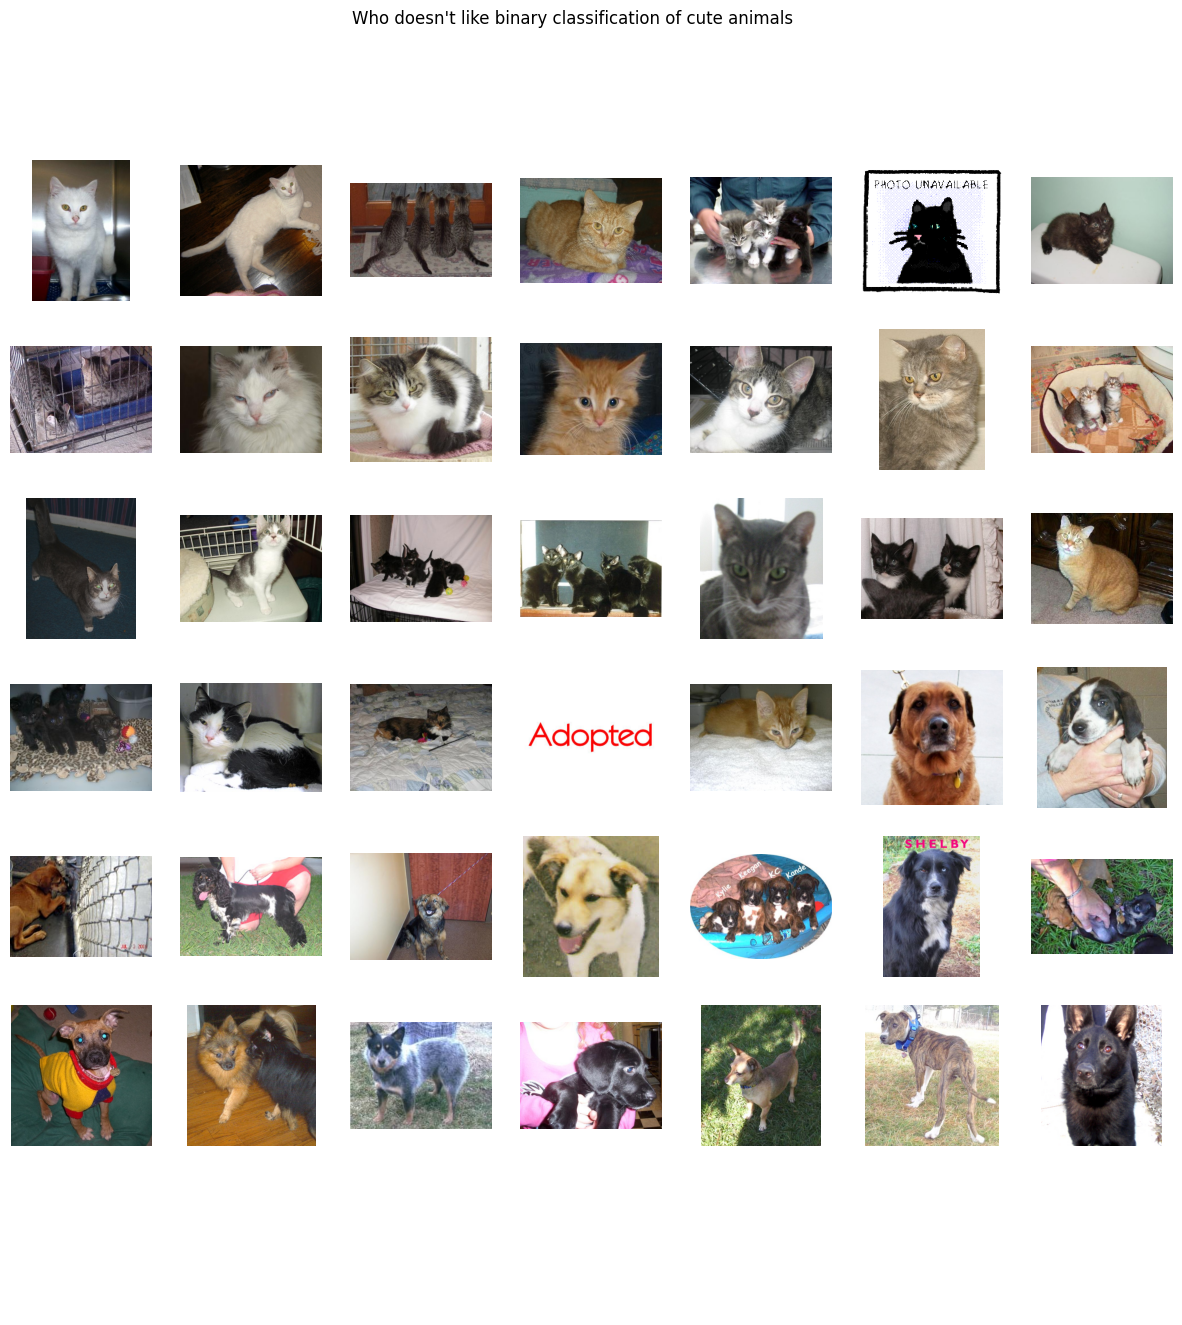

In [128]:
from matplotlib import pyplot as plt
larger_list=[]
directory= (os.getcwd()+'\PetImages\Cat')
q = 1
lengths1=len(pqm)
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list1:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(7,7,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+=1 #<- Make it so there are not so many files

In [129]:
directory= (os.getcwd()+'\PetImages\Cat')
for file in os.listdir(directory):
    if file in file_list:
        okay= os.path.join(directory,file)
        if os.path.exists(okay):
            os.remove(okay)
        else:
            pass

In [131]:
directory= (os.getcwd()+'\PetImages\Cat')
for file in os.listdir(directory):
    if file in file_list1:
        okay= os.path.join(directory,file)
        if os.path.exists(okay):
            os.remove(okay)
        else:
            pass

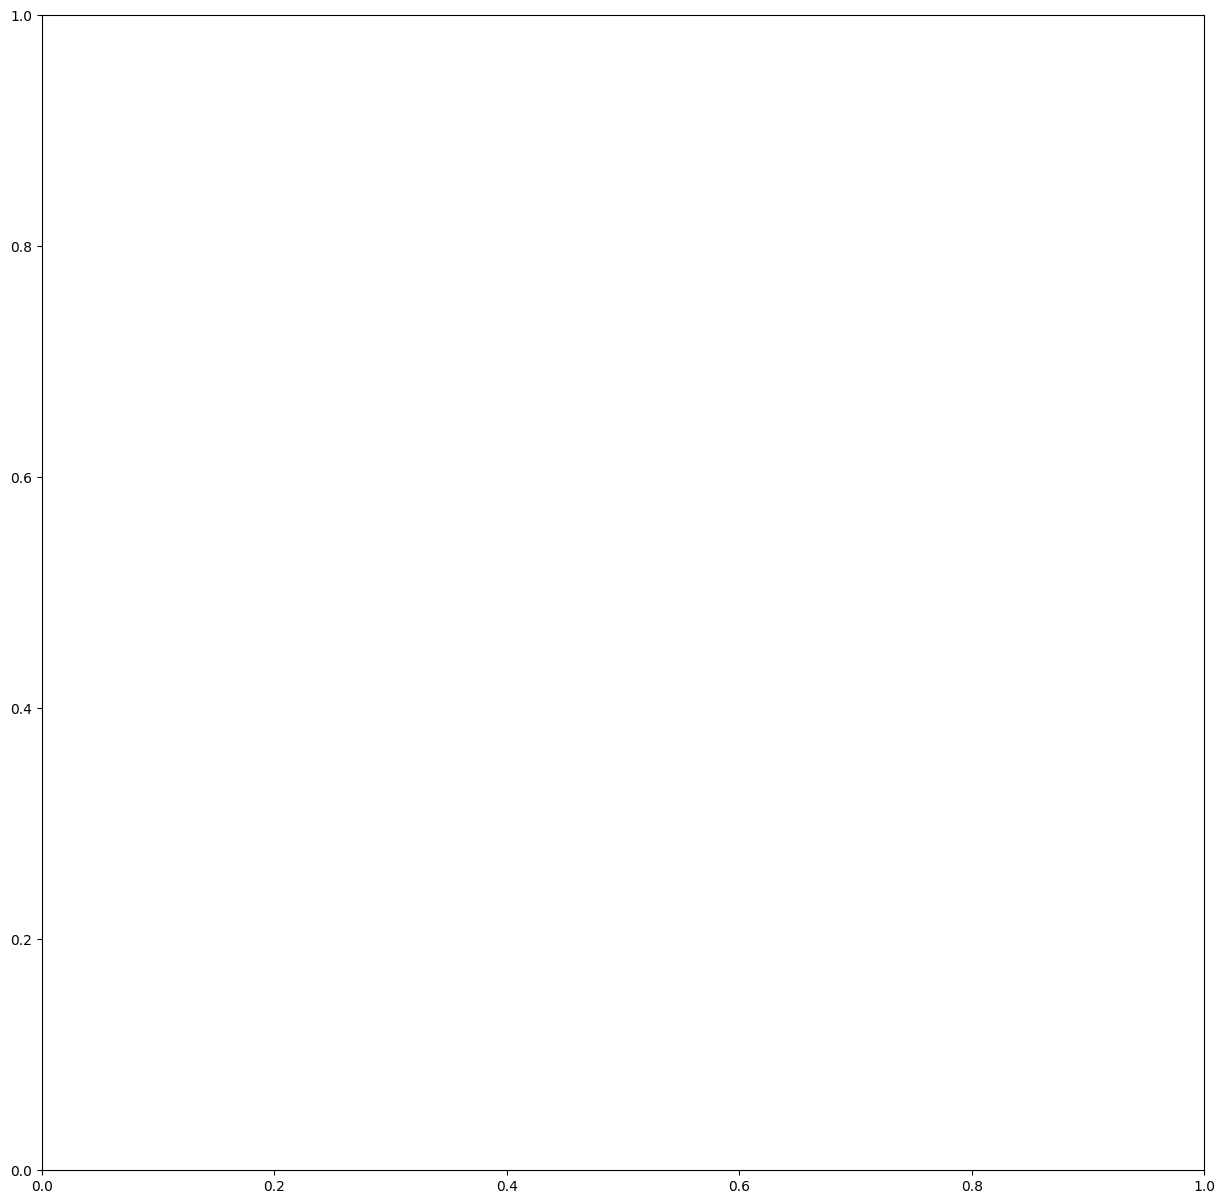

In [132]:
from matplotlib import pyplot as plt
larger_list=[]
directory= (os.getcwd()+'\PetImages\Cat')
q = 1
lengths1=len(pqm)
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(5,5,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+=1 #<- Make it so there are not so many files

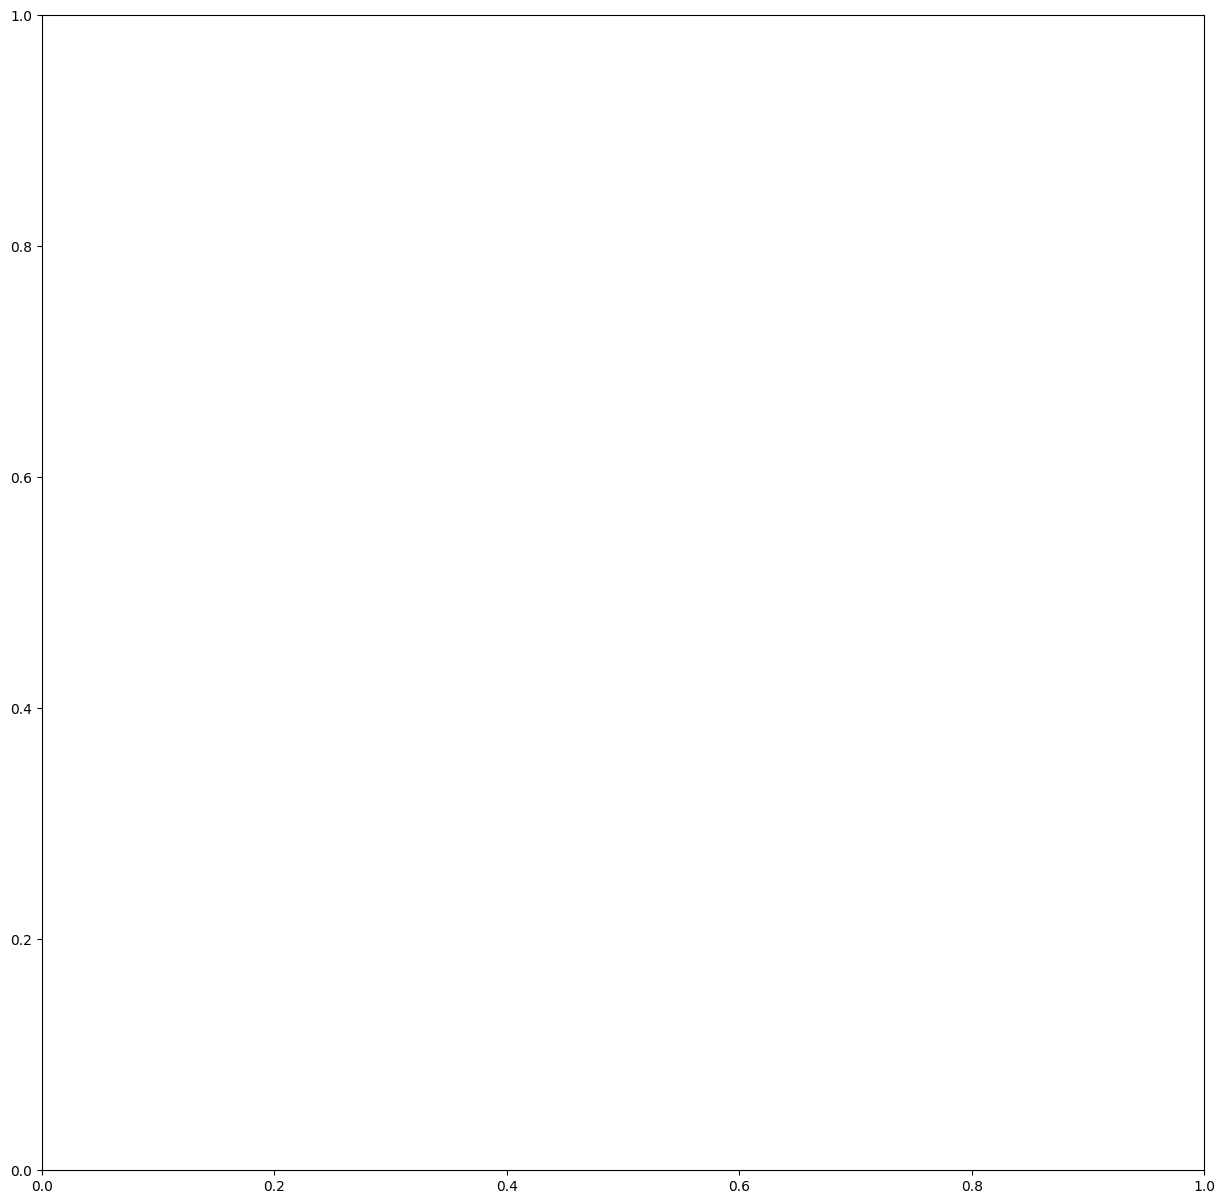

In [133]:
from matplotlib import pyplot as plt
larger_list=[]
directory= (os.getcwd()+'\PetImages\Cat')
q = 1
lengths1=len(pqm)
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list1:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(5,5,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+=1 #<- Make it so there are not so many files

In [134]:
directory1 = os.path.join(os.getcwd()+'\PetImages\Cat')

list_for_hashing = []
files_to_keep = []
files_to_purge = []
files_to_purge1 = []
for file in os.listdir(directory1):
    image1=imagehash.average_hash(Image.open(os.path.join(directory1,file)))
    if image1 not in list_for_hashing:
        list_for_hashing.append(image1)
        files_to_keep.append(file)
    else:
        print(file,image1)
        files_to_purge.append([file,image1])
        files_to_purge1.append(image1)

c:\Users\amcfa\Desktop\Pytorch_model_project_\.venv\Lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [3]:
directory1 = os.path.join(os.getcwd()+'\completely_new_images_sources_from_Kaggle\\_test')
list_for_hashing = []
files_to_keep = []
files_to_purge = []
files_to_purge1 = []
for file in os.listdir(directory1):
    image1=imagehash.average_hash(Image.open(os.path.join(directory1,file)))
    if image1 not in list_for_hashing:
        list_for_hashing.append(image1)
        files_to_keep.append(file)
    else:
        print(file,image1)
        files_to_purge.append([file,image1])
        files_to_purge1.append(image1)

making sure test data in one file is not mixed up with the other file

In [4]:
directory2 = os.path.join(os.getcwd()+'\\train')

list_for_hashing1 = []
files_to_keep1 = []
files_to_purge2 = []
files_to_purge3 = []
for file in os.listdir(directory2):
    image1=imagehash.average_hash(Image.open(os.path.join(directory2,file)))
    if image1 not in list_for_hashing1:
        list_for_hashing1.append(image1)
        files_to_keep1.append(file)
    else:
        print(file,image1)
        files_to_purge2.append([file,image1])
        files_to_purge3.append(image1)

c:\Users\amcfa\Desktop\Pytorch_model_project_\.venv\Lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [5]:
zipped = list(zip(files_to_keep, list_for_hashing))
zipped1 = list(zip(files_to_keep1, list_for_hashing1))
m = pd.DataFrame(zipped)
q = pd.DataFrame(zipped1)
pqm= q.merge(m, on = 1, how = 'inner')
file_list = list(pqm['0_x'])
file_list1 = list(pqm['0_y'])

In [6]:
pqm

Empty DataFrame
Columns: [0_x, 1, 0_y]
Index: []